<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

0.8420195439739414
0.7922077922077922


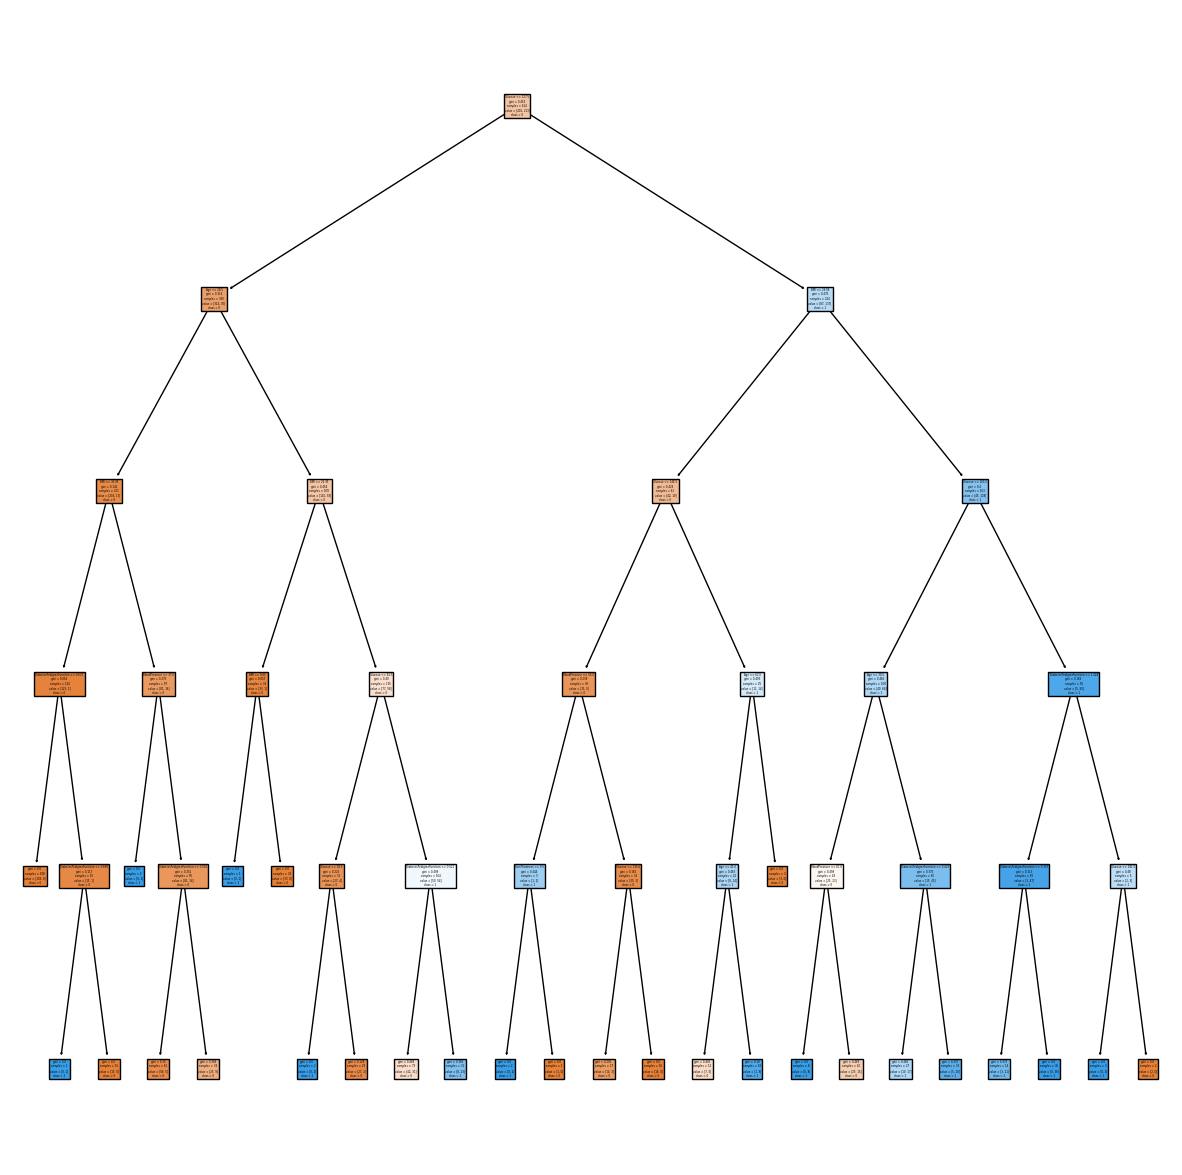

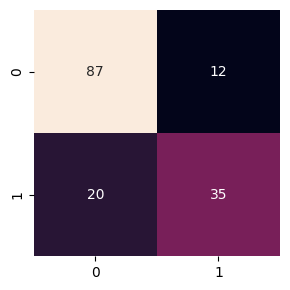

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import patsy
from patsy import dmatrices
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns




# Read data
df = pd.read_csv('/workspaces/machine-learning-python-template-ds-2023/Ryan/raw/diabetes.csv')

# See info
print(df.info())

# See data
print(df.head())

# Check for duplicates
print(f'''Duplicated: {df.duplicated().sum()}''')
duplicates = df[df.duplicated()]
print(duplicates)
df.drop_duplicates(inplace=True)

# Categorize columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
target = ['Outcome']

# Describe columns
print(df[numerical_columns].describe())

# Scale data
# Separate the features and the target ('Outcome') 
features = df.drop('Outcome', axis=1)
target = df['Outcome']

# Scale the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Re-add the 'Outcome' column to the scaled DataFrame
df_scaled = features_scaled_df.assign(Outcome=target)

# Create a function to update the plot
def update_plot(selected_features):
    filtered_df = df_scaled[selected_features + ['Outcome']]
    fig = px.parallel_coordinates(filtered_df, color='Outcome', color_continuous_scale=px.colors.diverging.Tealrose)
    fig.show()

# Create a list of feature names (excluding 'Outcome')
feature_names = df_scaled.columns.drop('Outcome').tolist()

# Create checkboxes for each feature
checkboxes = [widgets.Checkbox(value=True, description=label) for label in feature_names]

# Create a button to update the plot
update_button = widgets.Button(description="Update Plot")

# Define button click event handler
def on_button_clicked(b):
    selected_features = [cb.description for cb in checkboxes if cb.value]
    update_plot(selected_features)

update_button.on_click(on_button_clicked)

# Display checkboxes and button
display(widgets.VBox(checkboxes + [update_button]))


# Patsy formula
formula1 = 'Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age'
y, X = dmatrices(formula1, data=df, return_type='dataframe')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create model and fit
model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
model.fit(X_train, y_train)

# Predict y
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compare accuracy scores
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test, y_test_pred))


# View tree
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

cm_df = pd.DataFrame(cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()


